In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('results_with_crew.csv')
df.head()

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3031615,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""..."
1,tt0068646,The Godfather,1972,2,9.2,2116141,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""..."
2,tt0468569,The Dark Knight,2008,3,9.0,3008129,152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...","Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""..."
3,tt0167260,The Lord of the Rings: The Return of the King,2003,4,9.0,2070242,201,Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens, P...","Adventure, Drama, Fantasy","<a href=""https://www.imdb.com/title/tt0167260""...","<a href=""https://www.imdb.com/title/tt0167260""..."
4,tt0108052,Schindler's List,1993,5,9.0,1516877,195,Steven Spielberg,"Thomas Keneally, Steven Zaillian","Biography, Drama, History","<a href=""https://www.imdb.com/title/tt0108052""...","<a href=""https://www.imdb.com/title/tt0108052""..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           5000 non-null   object 
 1   primaryTitle     5000 non-null   object 
 2   startYear        5000 non-null   int64  
 3   rank             5000 non-null   int64  
 4   averageRating    5000 non-null   float64
 5   numVotes         5000 non-null   int64  
 6   runtimeMinutes   5000 non-null   int64  
 7   directors        5000 non-null   object 
 8   writers          4974 non-null   object 
 9   genres           5000 non-null   object 
 10  IMDbLink         5000 non-null   object 
 11  Title_IMDb_Link  5000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 468.9+ KB


In [20]:
df['genres'].value_counts()

genres
Comedy, Drama, Romance       229
Drama                        208
Comedy, Drama                174
Drama, Romance               168
Action, Crime, Drama         148
                            ... 
Comedy, Fantasy, Music         1
Comedy, Mystery, Thriller      1
Crime, Drama, Family           1
Crime, Horror, Sci-Fi          1
Action, Comedy, Family         1
Name: count, Length: 360, dtype: int64

In [22]:
df.isnull().sum()

tconst              0
primaryTitle        0
startYear           0
rank                0
averageRating       0
numVotes            0
runtimeMinutes      0
directors           0
writers            26
genres              0
IMDbLink            0
Title_IMDb_Link     0
dtype: int64

In [33]:
df.describe(include='object')

,tconst,primaryTitle,directors,writers,genres,IMDbLink,Title_IMDb_Link
count,5000,5000,5000,4974,5000,5000,5000
unique,5000,4909,2279,4373,360,5000,5000
top,tt5177088,Beauty and the Beast,Woody Allen,Woody Allen,"Comedy, Drama, Romance","<a href=""https://www.imdb.com/title/tt5177088""...","<a href=""https://www.imdb.com/title/tt5177088""..."
freq,1,3,40,33,229,1,1


In [35]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.corr(numeric_only=True)


,startYear,rank,averageRating,numVotes,runtimeMinutes
startYear,1.000000,0.259766,-0.275706,0.048981,0.088448
rank,0.259766,1.000000,-0.974393,-0.355024,-0.271647
averageRating,-0.275706,-0.974393,1.000000,0.387439,0.287453
numVotes,0.048981,-0.355024,0.387439,1.000000,0.203184
runtimeMinutes,0.088448,-0.271647,0.287453,0.203184,1.000000


# Analysis

<Axes: xlabel='startYear', ylabel='count'>

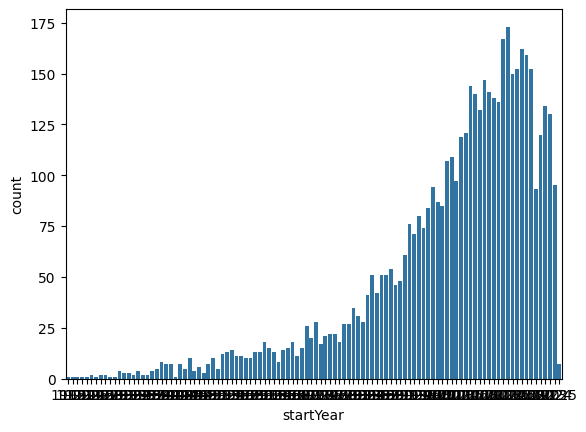

In [43]:
sns.countplot(x='startYear', data=df)

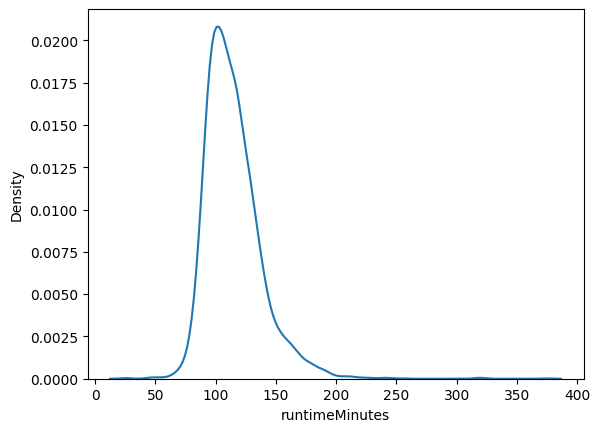

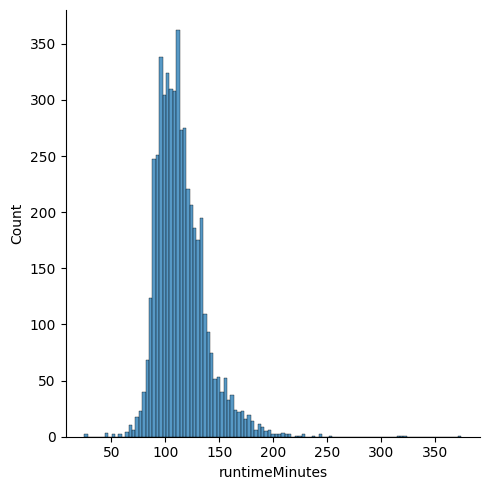

In [62]:
# sns.histplot(df['runtimeMinutes'])
sns.kdeplot(df['runtimeMinutes'])


sns.displot(df['runtimeMinutes'])

<Axes: xlabel='runtimeMinutes', ylabel='Count'>

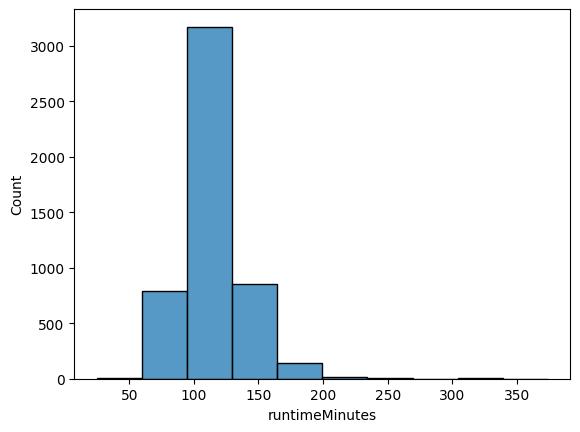

In [64]:
sns.histplot(df['runtimeMinutes'], bins=10)

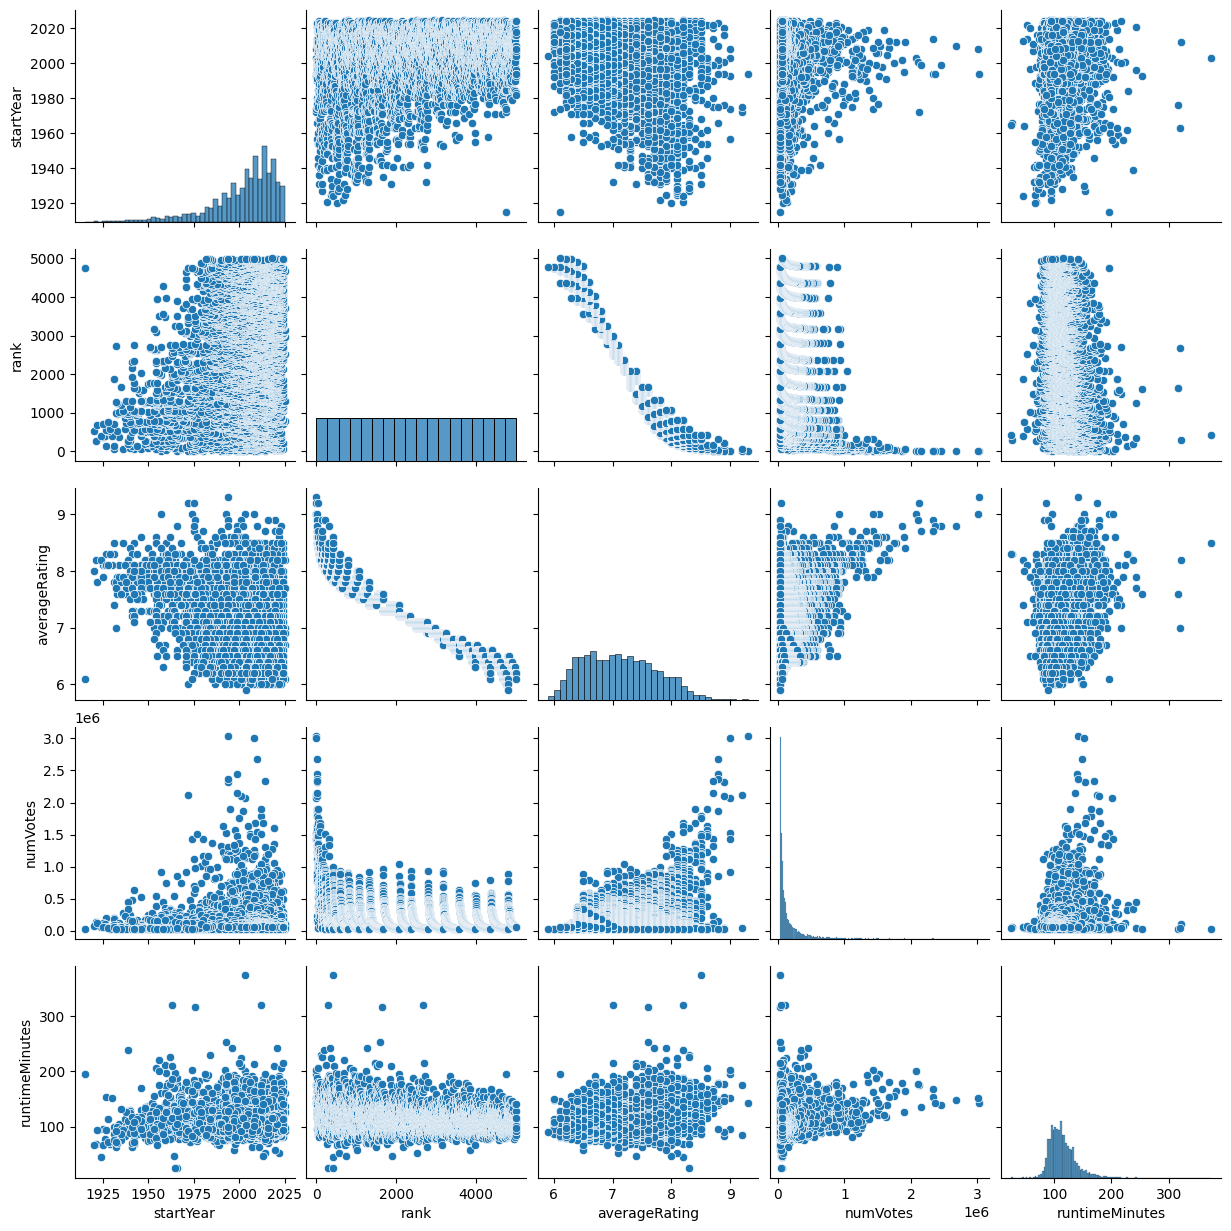

In [65]:
sns.pairplot(df)

<Axes: >

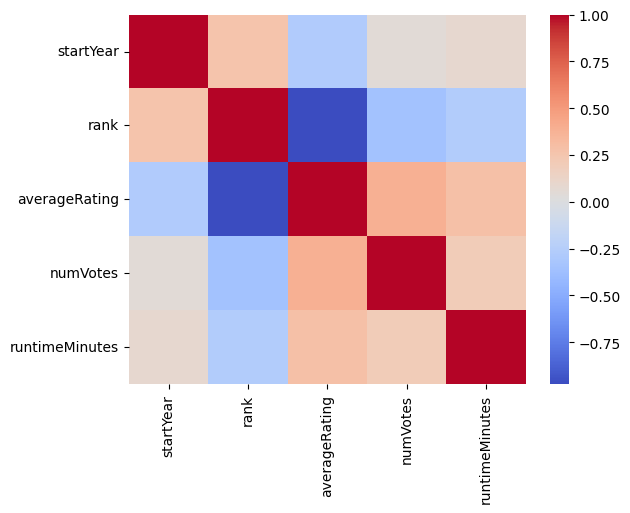

In [77]:
rel = df.corr(numeric_only=True)
sns.heatmap(rel, cmap='coolwarm')

In [78]:
df[df['averageRating'] > 9.0]

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3031615,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""..."
1,tt0068646,The Godfather,1972,2,9.2,2116141,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""..."
49,tt0252487,The Chaos Class,1975,50,9.2,44331,85,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",Comedy,"<a href=""https://www.imdb.com/title/tt0252487""...","<a href=""https://www.imdb.com/title/tt0252487""..."


In [53]:
df.sample

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
1171,tt1063669,The Wave,2008,1172,7.6,118227,107,Dennis Gansel,"Ron Jones, Johnny Dawkins, Ron Birnbach, Denni...","Drama, Thriller","<a href=""https://www.imdb.com/title/tt1063669""...","<a href=""https://www.imdb.com/title/tt1063669""..."


<Axes: >

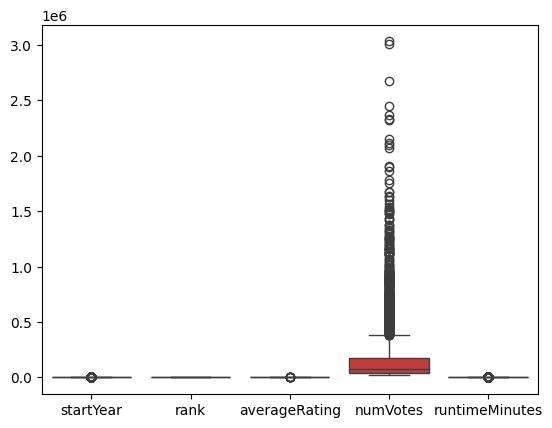

In [75]:
a = df.select_dtypes(include='number')
sns.boxplot(a)